In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from find_screen_utils import *

#*Image Processing*

## Edge Detection

In [30]:
img = cv2.imread('images/2.jpg')
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
(thresh, bw_img) = cv2.threshold(gray_img, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

In [31]:
edges = cv2.Canny(gray_img, threshold1=thresh, threshold2=thresh*1.5, apertureSize=3)

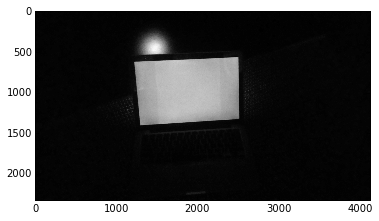

In [32]:
plt.imshow(gray_img, cmap='gray');

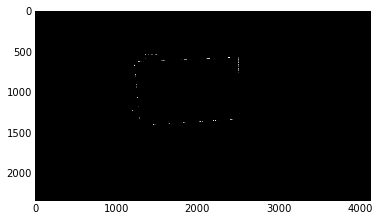

In [33]:
plt.imshow(edges, cmap='gray', clim=(0,255));

## Hough Lines

In [48]:
# Probabalistic (line segments)
line_img = np.array(img)
minLineLength = 100
maxLineGap = 15
lines = cv2.HoughLinesP(edges,1,np.pi/180, 80,100,minLineLength,maxLineGap)
for x1,y1,x2,y2 in lines[0]:
    cv2.line(line_img,(x1,y1),(x2,y2),(255,0,0),10, lineType=4)

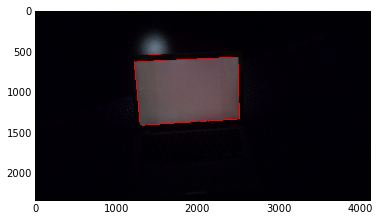

In [49]:
plt.imshow(line_img);

##Screen Extraction

In [36]:
plt_lines = get_lines(img, fit_edges(group_lines(lines[0])))

In [37]:
plt_img = np.array(img)
for x1,y1,x2,y2 in plt_lines:
    cv2.line(plt_img,(x1,y1),(x2,y2),(255,0,0),10, lineType=4)

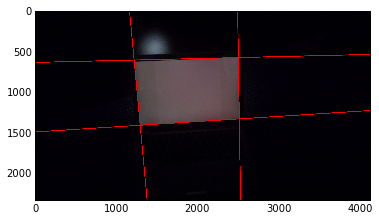

In [38]:
plt.imshow(plt_img);

In [39]:
corners = find_corners(img, plt_lines)

In [40]:
for corner in corners:
    cv2.circle(plt_img, corner, 25, [0,255,0], 10)

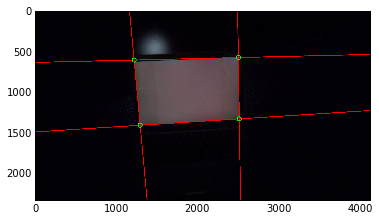

In [41]:
plt.imshow(plt_img);

In [42]:
corners = sort_corners(corners)

In [43]:
dest_corners = [(0,0), (1279,0), (1279,719), (0,719)]
trans = cv2.getPerspectiveTransform(np.array(corners).astype('float32'), np.array(dest_corners).astype('float32'))

In [44]:
trans_img = cv2.warpPerspective(img, trans, (1280,720))

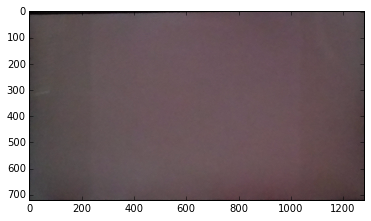

In [45]:
plt.imshow(trans_img);

#*Video Processing*

##Frame Extraction Check

In [10]:
img = cv2.imread('images/3.jpg')
proc_img = process_frame(img)

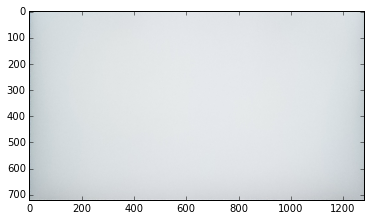

In [11]:
plt.imshow(proc_img);